# 

In [1]:
from UUMCdata.CausalModel import CausalModel, tsCausalModel

# Documentation

In [2]:
help(CausalModel)

Help on class CausalModel in module UUMCdata.CausalModel:

class CausalModel(builtins.object)
 |  CausalModel(N, init_type='ER', p=0.5, init=None, noise=None, labels=None)
 |
 |  Data-generation object, and methods for creating and manipulating them.
 |  - Always contains a causal graph with adjacencies `self.get_adjacencies()`
 |    where a_{ji}=1 <=> X_j -> X_i.
 |  - Becomes a linear additive Gaussian SCM after calling `self.gen_coefficients(...)`.
 |    Causal coefficients are given by `self.A` and noise standard deviations are
 |    given by `self.s`.
 |  - May also hold generated data after calling `self.gen_data(...)`.
 |
 |  Initialization Parameters
 |  _________________________
 |  N : int
 |      Number of vertices
 |  init_type : string (default: 'ER')
 |      Method for generating the adjacency matrix. Options include:
 |          'connected': a fully-connected acyclic time series DAG
 |          'ER': Erdös-Rényi random graph generation.
 |                Randomly include

# The simplest approach:

[X₃][X₁][X₂|X₃][X₀|X₂,X₃]


CausalModel at 0x7fffaa5e9590[X₃][X₁][X₂|X₃][X₀|X₂,X₃]

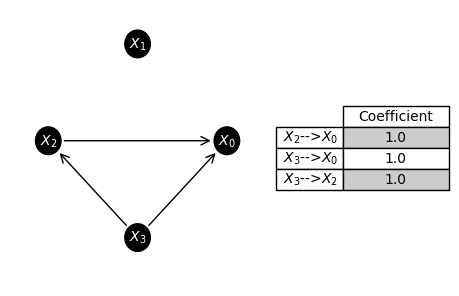

In [3]:
G = CausalModel(4)
G

X₃=U₃,			U₃~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=+0.41X₃+U₂,		U₂~N(0,0.91)
X₀=+0.17X₂-0.6X₃+U₀,	U₀~N(0,0.83)


CausalModel at 0x7fffaa5e9590
X₃=U₃,			U₃~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=+0.41X₃+U₂,		U₂~N(0,0.91)
X₀=+0.17X₂-0.6X₃+U₀,	U₀~N(0,0.83)

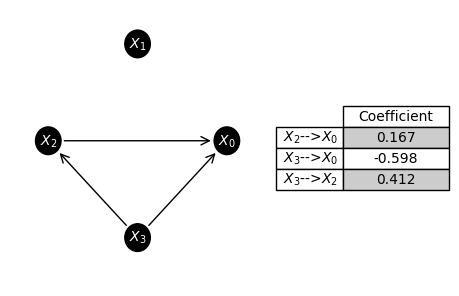

In [4]:
G.gen_coefficients()

Data object at 0x7fffac7e9a90: 
           X₀        X₁        X₂        X₃
0   -1.180081  2.598422  2.353935  1.337824
1   -0.873908  0.715442  1.344090 -0.103761
2   -0.024123  1.468718 -0.273868 -0.114462
3    1.307621  0.976737 -1.365334 -0.359840
4   -0.720195 -1.020397  0.092017 -0.625368
..        ...       ...       ...       ...
195 -0.131364  0.180159 -0.051677 -0.162641
196  1.445576 -0.395479 -1.836956 -2.304686
197 -2.373449 -0.068681  0.197501  1.777755
198 -0.934690  0.079578  1.494603  0.009219
199 -0.245152  1.213975  0.051883  0.182711

[200 rows x 4 columns]

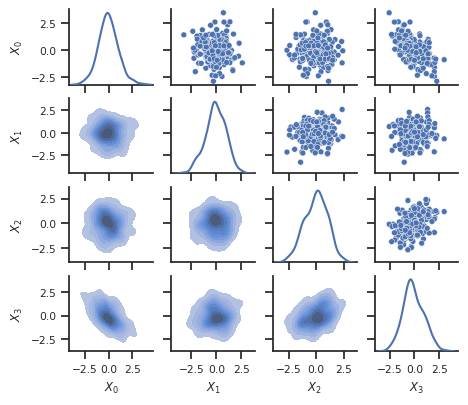

In [5]:
G.gen_data(200)

In [6]:
print(G.topo_order)

[3 1 2 0]


In [7]:
print(G.data.var().squeeze())

[1.04035104 1.01701041 1.03011444 1.03650251]


In [8]:
G.sortability('var')

0.6666666666666666

In [9]:
print(G.data.R2().squeeze())

[0.36353151 0.00254905 0.1825118  0.45038102]


In [10]:
G.sortability('R2')

0.3333333333333333

In [11]:
DS = CausalModel.gen_dataset(5,100,100);

100% completed


In [12]:
DS[0:2]

[CausalModel at 0x7fffaa5d5350
 X₄=U₄,			U₄~N(0,1.0)
 X₃=+0.73X₄+U₃,		U₃~N(0,0.68)
 X₂=-0.21X₃+0.19X₄+U₂,	U₂~N(0,0.99)
 X₁=-0.61X₃-0.27X₄+U₁,	U₁~N(0,0.56)
 X₀=-0.35X₂+0.7X₄+U₀,	U₀~N(0,0.64),
 CausalModel at 0x7fffaa5215b0
 X₃=U₃,				U₃~N(0,1.0)
 X₀=-0.83X₃+U₀,			U₀~N(0,0.56)
 X₂=-0.83X₃+U₂,			U₂~N(0,0.56)
 X₁=-0.27X₂-0.29X₃+U₁,		U₁~N(0,0.99)
 X₄=-0.66X₁-0.24X₂-0.6X₃+U₄,	U₄~N(0,0.66)]

In [13]:
[d.data for d in DS[0:2]]

[Data object at 0x7fffa9ed6d50: 
           X₀        X₁        X₂        X₃        X₄
 0  -0.176762  0.641364 -0.189442  0.940516 -0.409885
 1  -1.352173 -0.083546 -0.115973  0.014094 -1.091967
 2   1.680790 -2.381967  0.199249  2.776844  2.226067
 3  -0.741176  1.663879  1.332992 -0.836952 -1.209628
 4   0.682678 -1.407425  0.974101  1.008226  0.391886
 ..       ...       ...       ...       ...       ...
 95  0.436309 -0.719107  0.230324 -0.025533  0.552126
 96  0.472425  0.546134 -0.224550 -2.102299 -0.362909
 97 -0.862609  1.549775 -0.284251  0.370319 -1.359524
 98  1.516256  0.207359 -0.217959  0.243688  0.556943
 99 -0.257888  1.261945  0.480269 -0.916381 -0.719564
 
 [100 rows x 5 columns],
 Data object at 0x7fffa9ed6e90: 
           X₀        X₁        X₂        X₃        X₄
 0  -0.236533 -2.092503  0.934987  0.370039  1.165015
 1   0.492667  0.691949  0.781123 -0.610218  0.094986
 2  -1.064491 -1.225821 -0.887232  0.567774  0.779579
 3   0.077333 -0.989573  0.039841  0.638768

In [14]:
print([d.sortability() for d in DS])

[0.375, 0.42857142857142855, 0.7142857142857143, 0.2857142857142857, 0.5, 0.5, 0.25, 0.75, 0.5, 0.5, 0.6666666666666666, 0.16666666666666666, 0.6666666666666666, 1.0, 0.7777777777777778, 0.14285714285714285, 0.3333333333333333, 0.5, 0.5, 0.5, 0.6, 0.6, 0.4, 0.3333333333333333, 0.2857142857142857, 0.25, 0.0, 0.0, 0.5, 1.0, 0.6666666666666666, 0.5555555555555556, 0.42857142857142855, 0.25, 0.4, 0.1111111111111111, 0.5, 0.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.2, 1.0, 0.4, 0.5, 0.14285714285714285, 0.6666666666666666, 0.6, 0.5714285714285714, 0.6, 0.375, 0.1111111111111111, 0.8888888888888888, 0.5, 0.6666666666666666, 0.625, 0.0, 0.7142857142857143, 0.5, 0.4, 0.5, 0.0, 0.5, 0.4, 0.4444444444444444, 0.8, 0.5714285714285714, 0.6666666666666666, 0.3333333333333333, 0.5, 0.2, 0.2857142857142857, 0.4444444444444444, 1.0, 0.14285714285714285, 0.5, 0.0, 0.375, 0.5, 0.4444444444444444, 0.6666666666666666, 0.5, 0.5, 0.0, 1.0, 0.6, 0.2, 0.75, 0.3333333333333333, 0.375, 0.25, 1.0, 1.0, 0.125, 0.8571428571428

# Other generation options

In [15]:
help(CausalModel.gen_coefficients)

Help on function gen_coefficients in module UUMCdata.CausalModel:

gen_coefficients(self, style='UUMC', gen_args={})
    Creates an SCM from the graph using any STYLE from GENERATION_OPTIONS_:
    UUMC : Produces unitless, unrestricted, Markov-consistent SCMs.
           Introduced here, recommended (https://doi.org/10.48550/arXiv.2503.17037)
    unit-variance-noise : Draws coefficients uniformly from [-HIGH, -LOW]U[LOW, HIGH],
                          and sets all noise variances to 1. Defaults LOW=.5, HIGH=2.
                          Typically used (https://doi.org/10.48550/arXiv.1803.01422)
    iSCM : Begins with UVN SCM generation. The SCM is not complete until calling
           GEN_DATA. During data generation, the coefficients (and data) for each
           variable are standardized by the sample standard deviation of the gener-
           ated data before moving on to the next variable in the topological order
           (https://arxiv.org/abs/2406.11601)
    IPA : Each varia

X₂=U₂,				U₂~N(0,1.0)
X₃=+2.0X₂+U₃,			U₃~N(0,1.0)
X₀=-0.93X₂-1.42X₃+U₀,		U₀~N(0,1.0)
X₁=+1.47X₀-0.78X₂+1.99X₃+U₁,	U₁~N(0,1.0)
X₄=-1.36X₀+1.92X₂+0.71X₃+U₄,	U₄~N(0,1.0)


CausalModel at 0x7fffa9d2abd0
X₂=U₂,				U₂~N(0,1.0)
X₃=+2.0X₂+U₃,			U₃~N(0,1.0)
X₀=-0.93X₂-1.42X₃+U₀,		U₀~N(0,1.0)
X₁=+1.47X₀-0.78X₂+1.99X₃+U₁,	U₁~N(0,1.0)
X₄=-1.36X₀+1.92X₂+0.71X₃+U₄,	U₄~N(0,1.0)

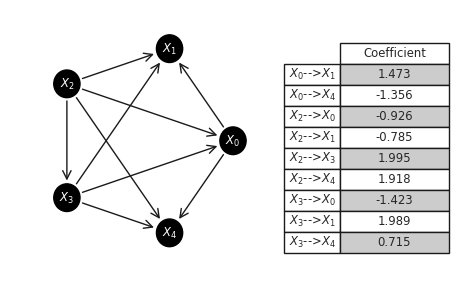

In [16]:
CausalModel(5, p=0.7).gen_coefficients(style='iSCM')

In [17]:
help(CausalModel.gen_dataset)

Help on method gen_dataset in module UUMCdata.CausalModel:

gen_dataset(N, O, B, init_args={}, coef_args={}, every=20) class method of UUMCdata.CausalModel.CausalModel
    Returns a list of B initialized CausalModels with N variables
    each containing generated data with O (for 'observations') samples.

    Parameters
    __________
    N : int
        Number of vertices
    O : int
        Number of samples
    B : int
        Number of SCMs
    init_args : dictionary (default: empty)
        additional arguments for CausalModel instantiation
        may include keys in ['init_type', 'p', 'init', 'noise', 'labels']
    coef_args : dictonary (default: empty)
        additional arguments for CausalModel.gen_coefficients()
        may include keys in ['style', 'gen_args']
    every : int (default: 20)
        The progress message is updated every time this many CausalModels are generated.

    Returns
    _______
    A list of initialized CausalModels with generated data.



In [18]:
import numpy as np

In [19]:
collider = np.array([[0, 0, 1], [0, 0, 1], [0, 0, 0]])
collider

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 0]])

In [20]:
DS = CausalModel.gen_dataset(3,100,100, 
                             init_args={'init_type': 'specified', 'init': collider}, 
                             coef_args={'style': 'unit-variance-noise', 'gen_args': {'low': 0.2}});

100% completed


X₀=U₀,			U₀~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=-1.55X₀-0.35X₁+U₂,	U₂~N(0,1.0)


CausalModel at 0x7fffa9d81850
X₀=U₀,			U₀~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=-1.55X₀-0.35X₁+U₂,	U₂~N(0,1.0)

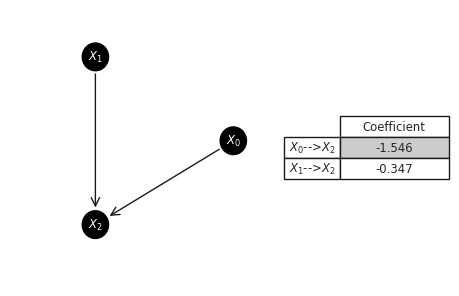

In [23]:
DS[42]

Data object at 0x7fffa9d6bbd0: 
          X₀        X₁        X₂
0  -0.253874 -1.275762  1.878873
1   0.277594  1.841872 -2.547110
2   2.020789 -0.189369 -2.869267
3   0.481117  0.160725  0.482949
4   1.055889  0.405890 -3.225151
..       ...       ...       ...
95  0.669670 -0.177392  0.879914
96 -0.607094  0.772032  0.088987
97 -1.233966 -0.285416  1.521424
98  0.887120  1.563309 -0.353879
99  0.977699  1.037143 -3.708260

[100 rows x 3 columns]

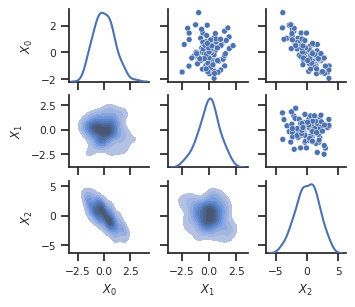

In [25]:
DS[42].data

# Exploring Additional Functionality

X₃=U₃,			U₃~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=+0.41X₃+U₂,		U₂~N(0,0.91)
X₀=+0.17X₂-0.6X₃+U₀,	U₀~N(0,0.83)


CausalModel at 0x7fffaa5e9590
X₃=U₃,			U₃~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=+0.41X₃+U₂,		U₂~N(0,0.91)
X₀=+0.17X₂-0.6X₃+U₀,	U₀~N(0,0.83)

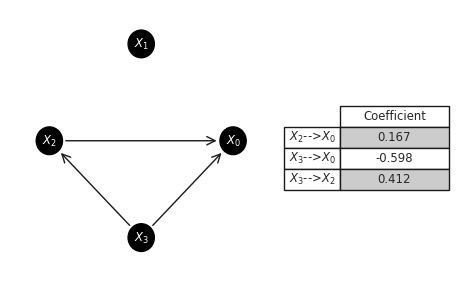

In [26]:
G

X₃=U₃,			U₃~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=+0.41X₃+U₂,		U₂~N(0,0.91)
X₀=+0.17X₂+0.6X₃+U₀,	U₀~N(0,0.83)


CausalModel at 0x7fffaa45d6d0
X₃=U₃,			U₃~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=+0.41X₃+U₂,		U₂~N(0,0.91)
X₀=+0.17X₂+0.6X₃+U₀,	U₀~N(0,0.83)

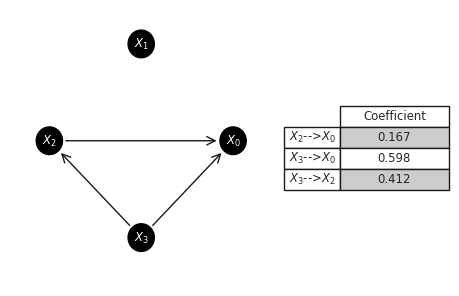

In [27]:
abs(G)

In [28]:
G==abs(G)

False

X₃=U₃,			U₃~N(0,1.0)
X₁=U₀,			U₀~N(0,1.0)
X₂=+0.41X₃+U₁,		U₁~N(0,0.91)
X₀=+0.17X₂-0.6X₃+U₂,	U₂~N(0,0.83)


CausalModel at 0x7fffaa249fd0
X₃=U₃,			U₃~N(0,1.0)
X₁=U₀,			U₀~N(0,1.0)
X₂=+0.41X₃+U₁,		U₁~N(0,0.91)
X₀=+0.17X₂-0.6X₃+U₂,	U₂~N(0,0.83)

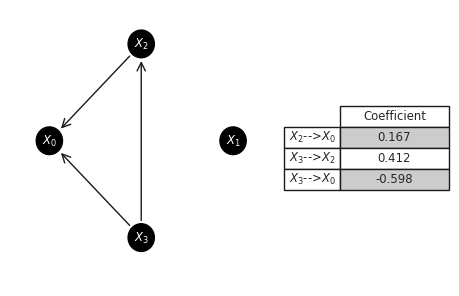

In [29]:
G2 = G.copy().shuffle()
G2

In [30]:
G==G2

True

X₃=U₃,		U₃~N(0,1.0)
X₁=U₁,		U₁~N(0,0.91)
X₂=-0.25X₃+U₂,	U₂~N(0,0.76)
X₀=U₀,		U₀~N(0,0.83)


CausalModel at 0x7fffaa45d190
X₃=U₃,		U₃~N(0,1.0)
X₁=U₁,		U₁~N(0,0.91)
X₂=-0.25X₃+U₂,	U₂~N(0,0.76)
X₀=U₀,		U₀~N(0,0.83)

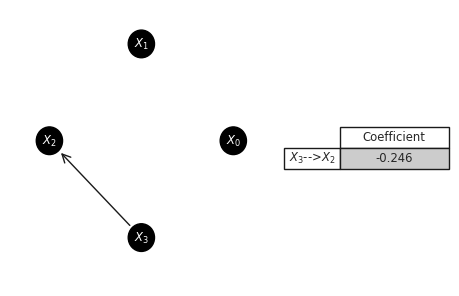

In [31]:
G*G2

X₃=U₃,			U₃~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=+0.17X₃+U₂,		U₂~N(0,0.83)
X₀=+0.03X₂+0.36X₃+U₀,	U₀~N(0,0.7)


CausalModel at 0x7fffaa24b890
X₃=U₃,			U₃~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=+0.17X₃+U₂,		U₂~N(0,0.83)
X₀=+0.03X₂+0.36X₃+U₀,	U₀~N(0,0.7)

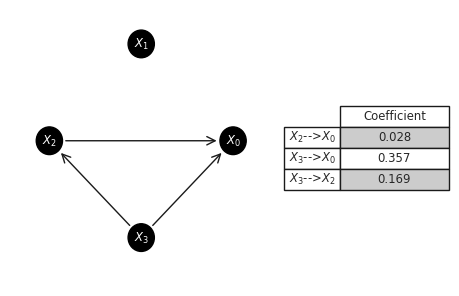

In [32]:
G**2

X₃=U₃,			U₃~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=+1.0X₃+U₂,		U₂~N(0,0.91)
X₀=+1.0X₂+1.0X₃+U₀,	U₀~N(0,0.83)


CausalModel at 0x7fffaa4322d0
X₃=U₃,			U₃~N(0,1.0)
X₁=U₁,			U₁~N(0,1.0)
X₂=+1.0X₃+U₂,		U₂~N(0,0.91)
X₀=+1.0X₂+1.0X₃+U₀,	U₀~N(0,0.83)

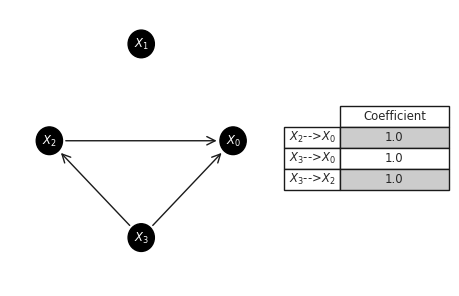

In [33]:
arr = G.A.copy()
arr[G.A==0]=1
G/arr

In [34]:
print(G[:,:])

[[ 0.          0.         -0.          0.        ]
 [ 0.         -0.         -0.          0.        ]
 [ 0.1665343   0.          0.          0.        ]
 [-0.5976314  -0.          0.41164305  0.        ]]


In [35]:
print(G.get_adjacencies())

[[False False False False]
 [False False False False]
 [ True False False False]
 [ True False  True False]]


In [36]:
print(G.get_num_parents())

[2 0 1 0]


In [37]:
print(G.ancestry())

[[False False False False]
 [False False False False]
 [ True False False False]
 [ True False  True False]]


In [38]:
print(G.AXIS_LABELS)

{'source': 0, 'sink': 1, None: None, 'time': 2}


In [39]:
print(G.any('source'))

[ True False  True False]


In [40]:
print(G.sum('sink'))

[ 0.          0.          0.1665343  -0.18598835]


X₃=U₃,		U₃~N(0,1.0)
X₁=U₀,		U₀~N(0,1.0)
X₂=U₁,		U₁~N(0,0.91)
X₀=+0.17X₂+U₂,	U₂~N(0,0.83)


CausalModel at 0x7fffaa431e50
X₃=U₃,		U₃~N(0,1.0)
X₁=U₀,		U₀~N(0,1.0)
X₂=U₁,		U₁~N(0,0.91)
X₀=+0.17X₂+U₂,	U₂~N(0,0.83)

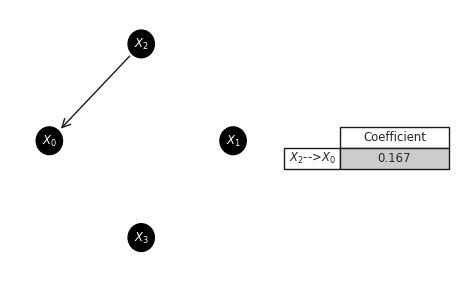

In [42]:
G2.triu()

X₀=U₀,			U₀~N(0,0.83)
X₁=U₁,			U₁~N(0,1.0)
X₂=+0.17X₀+U₂,		U₂~N(0,0.91)
X₃=-0.6X₀+0.41X₂+U₃,	U₃~N(0,1.0)


CausalModel at 0x7fffaa4334d0
X₀=U₀,			U₀~N(0,0.83)
X₁=U₁,			U₁~N(0,1.0)
X₂=+0.17X₀+U₂,		U₂~N(0,0.91)
X₃=-0.6X₀+0.41X₂+U₃,	U₃~N(0,1.0)

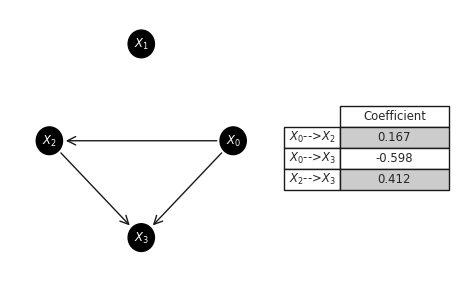

In [43]:
CausalModel.specified(G.transpose(), noise=G.s)

In [2]:
G = CausalModel(4)

[X₃][X₁][X₂|X₃][X₀|X₂]


CausalModel at 0x7fff9d7d4980[X₃][X₁][X₂|X₃][X₀|X₂]

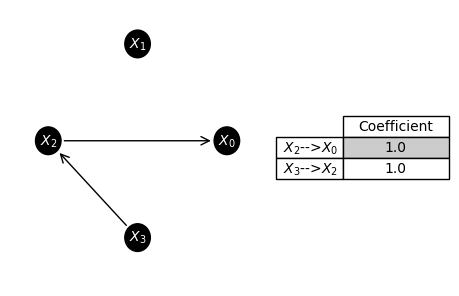

In [3]:
G

In [11]:
G_cl = G.to_causallearn()
print(G_cl)

Graph Nodes:
X1;X2;X3;X4

Graph Edges:
1. X3 --> X1
2. X4 --> X3



In [10]:
CausalModel.from_causallearn(G_cl)==G

True

In [15]:
import networkx as nx

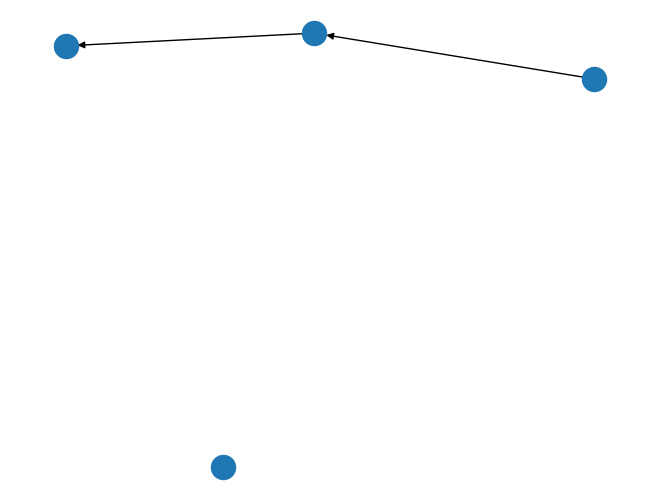

In [21]:
G_nx = G.to_networkx()
nx.draw(G_nx)

In [23]:
CausalModel.from_networkx(G_nx)==G

True

In [33]:
G.to_causaldag

<bound method CausalModel.to_causaldag of CausalModel at 0x7fff9d7d4980[X₃][X₁][X₂|X₃][X₀|X₂]>

In [34]:
G.to_causaldag()

ModuleNotFoundError: No module named 'graphical_models'

# Time Series (Beta)

## Documentation

In [45]:
help(tsCausalModel)

Help on class tsCausalModel in module UUMCdata.CausalModel:

class tsCausalModel(CausalModel)
 |  tsCausalModel(
 |      N,
 |      tau_max,
 |      init_type='ER',
 |      p=0.5,
 |      p_auto=0.8,
 |      init=None,
 |      noise=None,
 |      labels=None
 |  )
 |
 |  Time-series Data-generation object, and methods for creating and manipulating them.
 |  - Always contains a time-series causal graph with adjacencies self.A != 0
 |    (self.adjacencies() returns the adjacencies in the summary graph)
 |  - Becomes a linear additive Gaussian SCM after calling GEN_COEFFICIENTS.
 |    Causal coefficients are given by self.A and noise standard deviations are
 |    given by self.s.
 |  - May also hold generated data after calling GEN_DATA
 |
 |  Initialization Parameters
 |  __________
 |  N : int
 |      Number of random variables
 |  tau_max : int
 |      Maximum delay between a cause and its effect
 |  init_type : string (default: 'ER')
 |      Method for generating the adjacency matrix.

## Usage

tsCausalModel at 0x7fffac7592b0


tsCausalModel at 0x7fffac7592b0tsCausalModel at 0x7fffac7592b0

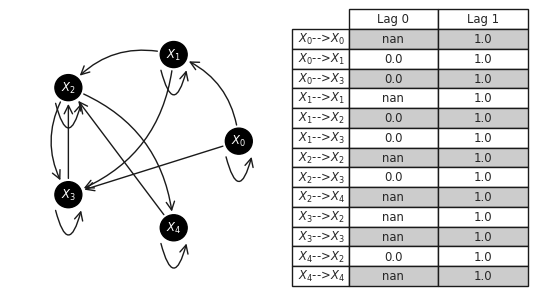

In [46]:
G = tsCausalModel(5, 1)
G

                                                                     
tsCausalModel at 0x7fffac7592b0


tsCausalModel at 0x7fffac7592b0
tsCausalModel at 0x7fffac7592b0

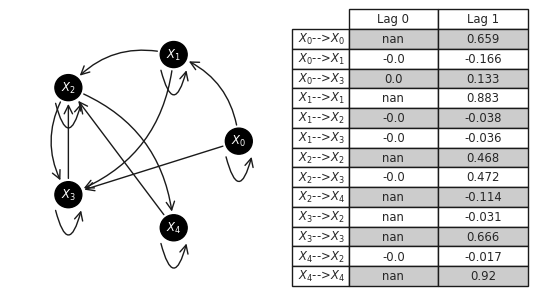

In [56]:
G.gen_coefficients()

Data object at 0x7fffa83d2ad0: 
           X₀        X₁        X₂        X₃        X₄
0    0.786998 -0.506351  0.481393 -1.024048  0.368597
1    1.520756 -0.466984  0.600613 -0.101777  0.234109
2    0.663114 -0.569473 -0.221975 -0.278691  0.614370
3   -1.248949 -0.248381 -0.309613 -0.029165  0.819328
4   -0.068142  0.201395 -0.133987 -0.189651  0.757480
..        ...       ...       ...       ...       ...
995  0.022247  0.324076  0.818815 -1.439561  0.421037
996 -0.028383  0.749813  0.393335 -0.552694  0.394432
997 -0.430765  0.353872  0.806585  0.095290  0.533719
998  0.575917  0.608485  1.703456  0.139585  0.853463
999  0.918328 -0.088753 -0.090319  1.449309  0.064683

[1000 rows x 5 columns]

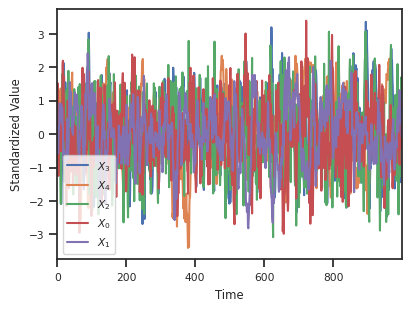

In [57]:
G.gen_data()

In [58]:
G.sortability()

0.8571428571428571

In [59]:
G.sortability('R2')

0.7142857142857143

In [60]:
G.sortability('R2_summary')

1.0

In [61]:
help(tsCausalModel.gen_dataset)

Help on method gen_dataset in module UUMCdata.CausalModel:

gen_dataset(
    N,
    tau_max,
    T,
    B,
    init_args={},
    coef_args={},
    time_limit=5,
    verbose=False,
    text_trap=None
) class method of UUMCdata.CausalModel.tsCausalModel
    Method for generating data from many random SCMs.

    Parameters
    _________
    N : int
        Number of nodes to include in a graph
    tau_max: int
        Maximum time-lag
    T : int, optional (Default: 1000)
        Number of observations in each generated time series
    B : int, optional (Default: 100)
        Number of SCMs (and associated data) to generate
    init_args : dict, optional (Default: {})
        additional arguments for graph initialization
    coef_args : dictionary, optional (Default: {})
        additional arguments for to gen_coefficients
    time_limit : int, optional (Default: 5)
        Maximum number of seconds to spend on each attempt at generating an SCM
    verbose : boolean, optional (Default: Fa

In [62]:
DS = tsCausalModel.gen_dataset(5,1,100,10);

Discarded 9 systems due to the following errors: 
0 ConvergenceErrors, 0 UnstableErrors, 1 GenerationError, and 8 TimeoutExceptions


In [63]:
DS[0:2]

[tsCausalModel at 0x7fffaa5bbce0
 tsCausalModel at 0x7fffaa5bbce0,
 tsCausalModel at 0x7fffac7b49d0
 tsCausalModel at 0x7fffac7b49d0]

In [64]:
[d.data for d in DS[0:2]]

[Data object at 0x7fffaa5bbbb0: 
           X₀        X₁        X₂        X₃        X₄
 0   0.282672 -0.002591  0.853689  0.062324  0.034314
 1   0.075987 -1.343367  1.144599 -0.036898 -1.497548
 2   0.058047  0.583644  2.499889 -1.886731  1.614697
 3  -1.766212  1.490607  1.153597 -1.979223  0.669420
 4  -0.261827  1.423402  1.755741 -1.092296 -1.202379
 ..       ...       ...       ...       ...       ...
 95  1.941206 -0.726586 -0.615659  1.420992 -1.448217
 96  0.915732  0.234013  0.467835 -0.529702 -0.073177
 97 -0.172019  0.915053  1.594220  0.693828  1.952241
 98  1.030431  0.351434  1.382436 -0.289110  2.050411
 99 -0.988980  1.367972  1.326644  0.029743 -1.409272
 
 [100 rows x 5 columns],
 Data object at 0x7fffac7b4510: 
           X₀        X₁        X₂        X₃        X₄
 0  -0.479787 -0.894428  0.099580 -0.536499  0.951488
 1   1.087137 -0.520590  1.860431 -0.183012  0.406939
 2  -0.666794  0.037980 -1.059665 -1.408981  1.619718
 3   0.275192  2.102020  0.423792 -0.036392

In [65]:
print(np.array([d.sortability() for d in DS]))

[0.5        0.75       0.42857143 0.66666667 0.16666667 0.
 0.5        0.22222222 0.75       0.5       ]


## Other initialization Options

tsCausalModel at 0x7fffa3aa9220


tsCausalModel at 0x7fffa3aa9220tsCausalModel at 0x7fffa3aa9220

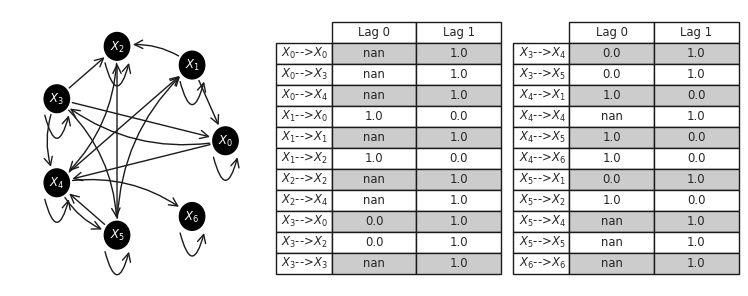

In [66]:
G = tsCausalModel(7,1, p_auto=1)
G

                                                                     
tsCausalModel at 0x7fffa3789220


tsCausalModel at 0x7fffa3789220
tsCausalModel at 0x7fffa3789220

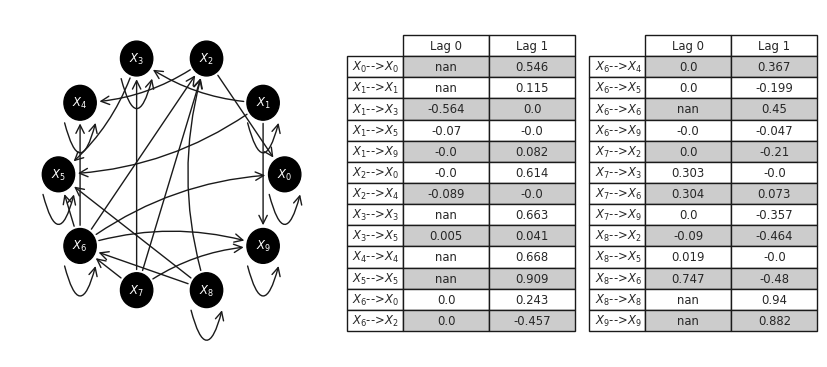

In [69]:
G = tsCausalModel(10, 1, init_type='no_feedback').gen_coefficients() #faster!
G

Data object at 0x7fffa9ddd3d0: 
           X₀        X₁        X₂        X₃        X₄        X₅        X₆  \
0    1.538131  0.453545  0.579757 -2.217519 -1.164016  1.170750  0.869892   
1    1.339729  0.989090 -0.173614 -2.111325 -0.221188  0.790465  0.611307   
2    0.234991  0.533819 -1.362844 -2.274777  0.056620  0.599953  1.143416   
3   -0.137421  0.272810 -1.176419 -1.335732  0.387422  0.283097  0.264442   
4   -0.785917 -0.727855 -0.285195 -0.610425  0.200563  0.267246 -1.092273   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.934483 -1.374212 -0.733302  0.703345  1.083818 -0.938002  1.011154   
996 -0.418169  0.313422 -2.044172 -0.349930  1.255609 -1.023533 -0.519753   
997 -1.503482 -0.162259 -1.422334 -0.200726  0.861076 -0.710108  0.300678   
998 -2.296103 -0.177483 -1.705932  0.481844  0.780028 -0.703124 -0.100870   
999 -3.063949 -0.934755 -1.005010  1.174898  1.031276 -0.554155  0.994150   

           X₇        X₈        X₉  
0   -1.586645  0.445642  2.200869  
1   -0.756641  1.002959  2.304195  
2   -0.561081  1.554408  2.764157  
3   -0.656559  1.533882  2.883770  
4   -1.478748  1.307348  2.864848  
..        ...       ...       ...  
995  0.419447  2.367979  0.047007  
996 -2.339362  2.058830 -0.809599  
997  1.436958  2.116639  0.393402  
998  0.207094  1.772848 -0.421691  
999  1.052984  1.258744 -0.550746  

[1000 rows x 10 columns]

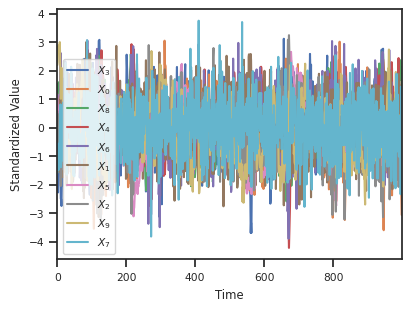

In [70]:
G.gen_data()

In [71]:
print(G.data.var())

[[1.12775992]
 [1.05719242]
 [1.00541197]
 [1.22011973]
 [1.08350204]
 [1.05470218]
 [1.05762731]
 [0.97874961]
 [1.10788075]
 [1.00540356]]


In [72]:
G.sortability()

0.5416666666666666

In [73]:
G.sortability('R2')

0.8333333333333334

In [74]:
G.sortability('R2_summary')

0.5